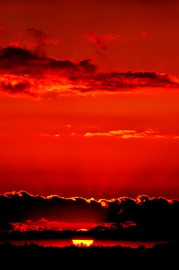

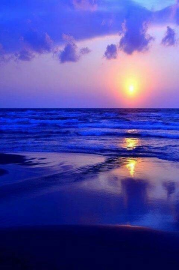

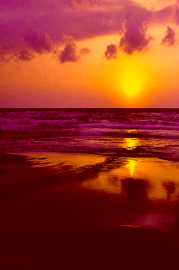

-1

In [8]:
import numpy as np
import cv2
import argparse
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt




# This function will return us the image stats
# We input an image in the L*a*b* color space and it returns
# a tuple of mean and std for L*, a* and b* respectively.
def image_stats(image):
    # Compute the mean and standard deviation of each channel
    (l, a, b) = cv2.split(image)
    (l_mean, l_std) = (l.mean(), l.std())
    (a_mean, a_std) = (a.mean(), a.std())
    (b_mean, b_std) = (b.mean(), b.std())

    # return the color statistics
    return (l_mean, l_std, a_mean, a_std, b_mean, b_std)


# This function will perform color transfer from one input image (source)
# onto another input image (destination)
def color_transfer(source, destination):
    # Convert the images from the RGB to L*a*b* color space, being
    # sure to utilizing the floating point data type (note: OpenCV
    # expects floats to be 32-bit, so use that instead of 64-bit)
    source = cv2.cvtColor(source, cv2.COLOR_BGR2LAB).astype("float32")
    destination = cv2.cvtColor(destination, cv2.COLOR_BGR2LAB).astype("float32")

    # Compute color statistics for the source and destination images
    (l_mean_src, l_std_src, a_mean_src, a_std_src, b_mean_src, b_std_src) = image_stats(source)
    (l_mean_dest, l_std_dest, a_mean_dest, a_std_dest, b_mean_dest, b_std_dest) = image_stats(destination)

    # Subtract the means from the destination image
    (l, a, b) = cv2.split(destination)
    l -= l_mean_dest
    a -= a_mean_dest
    b -= b_mean_dest

    # Scale by the standard deviations
    l = (l_std_dest / l_std_src) * l
    a = (a_std_dest / a_std_src) * a
    b = (b_std_dest / b_std_src) * b

    # Add in the source mean
    l += l_mean_src
    a += a_mean_src
    b += b_mean_src

    # Clip the pixel intensities to [0, 255] if they fall outside this range
    l = np.clip(l, 0, 255)
    a = np.clip(a, 0, 255)
    b = np.clip(b, 0, 255)

    # Merge the channels together and convert back to the RGB color space,
    # being sure to utilize the 8-bit unsigned integer data type.
    transfer = cv2.merge([l, a, b])
    transfer = cv2.cvtColor(transfer.astype("uint8"), cv2.COLOR_LAB2BGR)

    # Return the color transferred image
    return transfer


def show_image(title, image, width = 300):
    # Resize the image to have a constant width, just to make displaying the
    # images take up less screen space
    r = width / float(image.shape[1])
    dim = (width, int(image.shape[0] * r))
    resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)

    # Show the resized image
    cv2.imshow(title, resized)


# Image file names
source = "sunset.jpg"
destination = "blue.jpg"
output = "transferred.jpg"

# Read the images
source = cv2.imread(source)
destination = cv2.imread(destination)

# Transfer the color from source to destination
transferred = color_transfer(source, destination)

# Write the image onto disk (if output is not None)
if output is not None:
    cv2.imwrite(output, transferred)

# Show the images
scale_percent = 30
width = int(source.shape[1] * scale_percent / 100)
height = int(source.shape[0] * scale_percent / 100)
dim = (width, height)
  

source = cv2.resize(source, dim, interpolation = cv2.INTER_AREA)
destination = cv2.resize(destination, dim, interpolation = cv2.INTER_AREA)
transferred = cv2.resize(transferred, dim, interpolation = cv2.INTER_AREA)








cv2_imshow(source)
cv2_imshow(destination)
cv2_imshow(transferred)
cv2.waitKey(0)